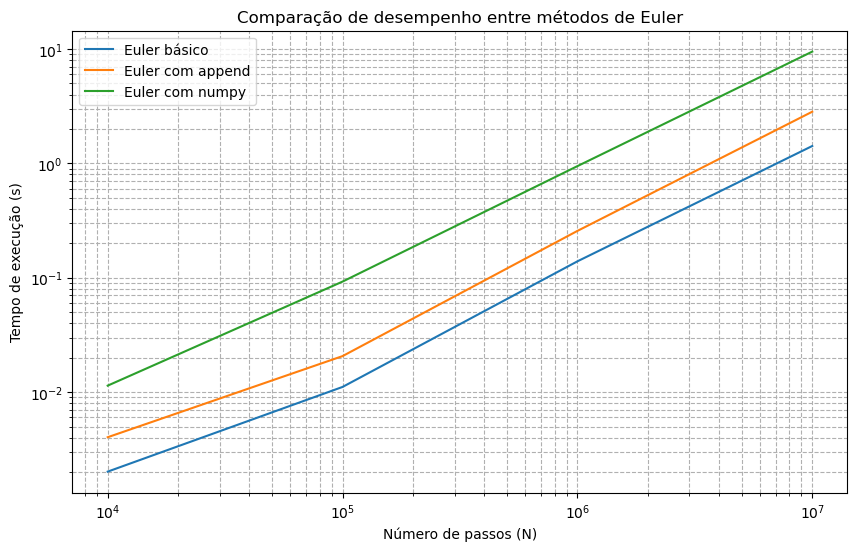

Euler (x, v): (360.50383, 61.94962)
Runge-Kutta (x, v): (360.52185, 61.94781)
Erro em x: 1.80268e-02
Erro em v: 1.80268e-03


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Constantes do problema
g = 9.8       # gravidade (m/s²)
k = 0.1       # coeficiente de resistência (1/s)
t_final = 10  # tempo final (s)

# Função para implementar o método de Euler explícito (sem listas)
def euler_basico(dt):
    N = int(t_final / dt)
    t = 0
    x = 0
    v = 0
    for _ in range(N):
        v = v + dt * (g - k * v)
        x = x + dt * v
        t = t + dt
    return x, v

# Função para o método de Euler usando append (listas)
def euler_append(dt):
    N = int(t_final / dt)
    t = 0
    x = 0
    v = 0
    x_list = [x]
    v_list = [v]
    for _ in range(N):
        v = v + dt * (g - k * v)
        x = x + dt * v
        x_list.append(x)
        v_list.append(v)
    return x_list[-1], v_list[-1]

# Função para o método de Euler com pré-alocação (NumPy)
def euler_numpy(dt):
    N = int(t_final / dt)
    x = np.zeros(N+1)
    v = np.zeros(N+1)
    for i in range(N):
        v[i+1] = v[i] + dt * (g - k * v[i])
        x[i+1] = x[i] + dt * v[i]
    return x[-1], v[-1]

# Método de Runge-Kutta de 4ª ordem para comparação
def runge_kutta_4(dt):
    N = int(t_final / dt)
    x = 0
    v = 0
    for _ in range(N):
        kv1 = g - k * v
        kx1 = v

        kv2 = g - k * (v + 0.5 * dt * kv1)
        kx2 = v + 0.5 * dt * kv1

        kv3 = g - k * (v + 0.5 * dt * kv2)
        kx3 = v + 0.5 * dt * kv2

        kv4 = g - k * (v + dt * kv3)
        kx4 = v + dt * kv3

        v += (dt / 6) * (kv1 + 2*kv2 + 2*kv3 + kv4)
        x += (dt / 6) * (kx1 + 2*kx2 + 2*kx3 + kx4)

    return x, v

# Comparação de tempos
def medir_tempos():
    dt_list = [10**(-i) for i in range(3, 7)]  # 1e-3 a 1e-6
    tempos_basico = []
    tempos_append = []
    tempos_numpy = []

    for dt in dt_list:
        inicio = time.time()
        euler_basico(dt)
        tempos_basico.append(time.time() - inicio)

        inicio = time.time()
        euler_append(dt)
        tempos_append.append(time.time() - inicio)

        inicio = time.time()
        euler_numpy(dt)
        tempos_numpy.append(time.time() - inicio)

    return dt_list, tempos_basico, tempos_append, tempos_numpy

# Plotando os tempos de execução
def plotar_tempos(dt_list, t1, t2, t3):
    N_list = [int(t_final / dt) for dt in dt_list]
    plt.figure(figsize=(10, 6))
    plt.loglog(N_list, t1, label='Euler básico')
    plt.loglog(N_list, t2, label='Euler com append')
    plt.loglog(N_list, t3, label='Euler com numpy')
    plt.xlabel('Número de passos (N)')
    plt.ylabel('Tempo de execução (s)')
    plt.title('Comparação de desempenho entre métodos de Euler')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()

# Comparação de precisão com Runge-Kutta
def comparar_runge_kutta():
    dt = 0.001
    x_euler, v_euler = euler_numpy(dt)
    x_rk, v_rk = runge_kutta_4(dt)
    print(f"Euler (x, v): ({x_euler:.5f}, {v_euler:.5f})")
    print(f"Runge-Kutta (x, v): ({x_rk:.5f}, {v_rk:.5f})")
    print(f"Erro em x: {abs(x_euler - x_rk):.5e}")
    print(f"Erro em v: {abs(v_euler - v_rk):.5e}")

# Execução principal
if __name__ == "__main__":
    dt_list, t1, t2, t3 = medir_tempos()
    plotar_tempos(dt_list, t1, t2, t3)
    comparar_runge_kutta()